<h1>Inversion Count Analysis</h1>
Comparing the performance between the Brute Force and the Divide and Conquer approaches.

<h5>Alberto Nicolai Romero Martínez - C.C.1031179247</h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import *
import sys
import math

In [2]:
def merge_inversions(l):
    
    if len(l) == 1: 
        return l , 0, 1
    
    left,  lin, lcomp = merge_inversions( l[:len(l)/2])
    right, rin, rcomp = merge_inversions( l[len(l)/2:])
    comp = 1 + lcomp + rcomp
    c = []
    inv = 0 + lin + rin 
    i = 0
    j = 0    
    while i< len(left) and j < len(right):
        comp += 3
        if left[i]<= right[j]:
            c.append(left[i])
            i+=1
            
        else:
            c.append(right[j])
            j+=1
            inv+= len(left) - i
            
    comp+=2
    c += right[j:]
    c += left[i:]
        
    return c, inv , comp



def brute_inversions(array):    
    inv = 0
    comp = 0
    for j in range(1, len(array)):
        comp+=1
        item = array[j]
        i = j - 1     
        while( i > -1) and (array[i] > item):
            comp+= 2
            array[i+1] = array[i]
            i-=1 
            inv += 1
        array[i+1] = item    
        comp+=2
    comp+=1
    return inv, comp





In [3]:
def plot_inversions(n):
    
    merging_time = []
    brute_time = []
    merging_comp = []
    brute_comp = []
    max_time = 0
    max_comp = 0
    
    for i in range(1 , n):
        
        
        inputarray = range( i, 0, -1)        
        start_time = time.time()
        _l,_i, mcomp = merge_inversions(inputarray)
        mtime = time.time() - start_time
        

        merging_time.append(mtime)
        merging_comp.append(mcomp)
        
        
        inputarray = range( i, 0, -1)     
        
        start_time = time.time()
        _i, bcomp = brute_inversions(inputarray)
        btime = time.time() - start_time    
        

        brute_time.append(btime)
        brute_comp.append(bcomp)       
    
    
    plt.plot(merging_time)
    plt.plot(brute_time)
    plt.xlabel('Size of the instance (n)')
    plt.ylabel('Time (s)')
    plt.legend(['Divide and conquer','Brute force'])
    plt.xlim(1,n)
    
    
    plt.show()
    plt.close()
    
    plt.plot(merging_comp)
    plt.plot(brute_comp)
    plt.xlabel('Size of the instance (n)')
    plt.ylabel('Number of comparisons')
    plt.legend(['Divide and conquer','Brute force'])
    plt.xlim(1,n)
    
    
    plt.show()
    plt.close()                                   

In [4]:
array = []
with open('input.txt') as f:   
    n =   next (f)    
    for line in f:
        array.append(  map(int ,line.split())  )
        
        
            
        

nparray = np.array(array)
array = nparray.flatten().tolist()


size = 10000



start = time.time()
_,i,c = merge_inversions(array[0:size])
ttime = time.time() - start

print 'Inversion Count with input array of 10^5 entries\n'
print 'Using divide and conquer approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime

start = time.time()
i,c = brute_inversions(array[0:size])
ttime = time.time() - start

print 'Inversion Count with input array of 10^5 entries\n'
print 'Using brute force approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime

start = time.time()
_,i,c = merge_inversions(range(1,size))
ttime = time.time() - start

print 'Inversion Count with increasing order array of 10^5 entries\n'
print 'Using divide and conquer approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime

start = time.time()
i,c = brute_inversions(range(1,size))
ttime = time.time() - start

print 'Inversion Count with increasing order array of 10^5 entries\n'
print 'Using brute force approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime


start = time.time()
_,i,c = merge_inversions(range(size,1,-1))
ttime = time.time() - start

print 'Inversion Count with decreasing order array of 10^5 entries\n'
print 'Using divide and conquer approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime

start = time.time()
i,c = brute_inversions(range(size,1,-1))
ttime = time.time() - start

print 'Inversion Count with decreasing order array of 10^5 entries\n'
print 'Using divide and conquer approach:'
print 'Number of inversions: ', i
print 'Number of comparisons: ' , c
print 'Time ellapsed: ', ttime
 


Inversion Count with input array of 10^5 entries

Using divide and conquer approach:
Number of inversions:  25196389
Number of comparisons:  401557
Time ellapsed:  0.0390000343323
Inversion Count with input array of 10^5 entries

Using brute force approach:
Number of inversions:  25196389
Number of comparisons:  50422776
Time ellapsed:  2.8220000267
Inversion Count with increasing order array of 10^5 entries

Using divide and conquer approach:
Number of inversions:  0
Number of comparisons:  233793
Time ellapsed:  0.0260000228882
Inversion Count with increasing order array of 10^5 entries

Using brute force approach:
Number of inversions:  0
Number of comparisons:  29995
Time ellapsed:  0.0019998550415
Inversion Count with decreasing order array of 10^5 entries

Using divide and conquer approach:
Number of inversions:  49985001
Number of comparisons:  246996
Time ellapsed:  0.0309998989105
Inversion Count with decreasing order array of 10^5 entries

Using divide and conquer approach:
N

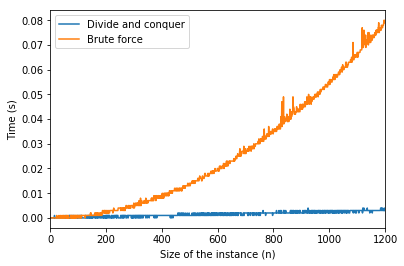

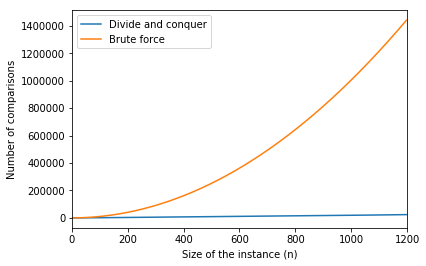

In [5]:
plot_inversions(1200)